In [4]:
# import matplotlib, colormap, and pandas
from matplotlib import pyplot as plt
import pandas as pd

# load data
ic_data = pd.read_csv('icecream_data.csv')

In [5]:
# display graphs correctly
%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 3)
plt.rcParams['figure.dpi'] = 75

In [6]:
ic_data.head()

,day,date,day_of_week,day_of_week_num,humidity_afternoon,max_temp,sales_error,sales_total,top_flavor
0,1,08-01,monday,0,61,86,4.37,619.89,coffee
1,2,08-02,tuesday,1,59,87,2.92,562.28,moosetracks
2,3,08-03,wednesday,2,52,81,4.28,604.46,coffee
3,4,08-04,thursday,3,54,88,4.32,667.19,coffee
4,5,08-05,friday,4,54,87,8.91,693.86,coffee


### Bar Graph

1. First up, make a bar chart to examine sales numbers for each day of the month. Add a horizontal AB line at $640, the owner’s benchmark for a successful sales day. Add error bars using the sales_error column.

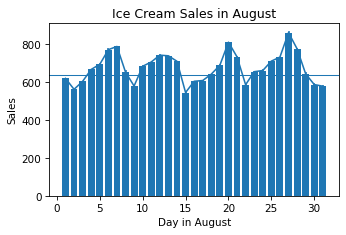

In [7]:
# make a bar chart
plt.bar(x = ic_data.day, height = ic_data.sales_total)
plt.axhline(y = 640, linewidth = 1)
plt.errorbar(x = ic_data.day, y = ic_data.sales_total, yerr = ic_data.sales_error)

plt.title('Ice Cream Sales in August')
plt.xlabel('Day in August')
plt.ylabel('Sales')
plt.show()

In [20]:
plt.savefig('ice_cream_sales-bar_graph_august.png', bbox_inches='tight', dpi=350)

<Figure size 900x450 with 0 Axes>

2. There definitely appears to be some kind of pattern, so let’s visualize this data by day of the week. Run the cell below to create a new avg_by_day dataframe. This script groups the sales data by day of the week and returns the average sales data for each day, so that we can make one averaged bar for each day. (If you want to learn how to do this on your own using pandas, check out our Data Science with Python content!)

In [8]:
# create our averaged bar graph data
avg_by_day = ic_data.groupby([ic_data['day_of_week_num'], ic_data['day_of_week']])['sales_total'].mean()
avg_by_day = avg_by_day.droplevel(0,'index').reset_index(name='sales_avg')
avg_by_day

,day_of_week,sales_avg
0,monday,609.6780
1,tuesday,597.8500
2,wednesday,627.3640
3,thursday,681.6525
4,friday,714.4100
5,saturday,795.4200
6,sunday,751.6550


3. Using our new avg_by_day dataframe, make a bar chart by day of the week to help the owner see which day has the best sales, and which has the worst. Add the horizontal AB line at $640 again for reference. If the owner decides to close up shop one or two days of the week, which days make most sense?

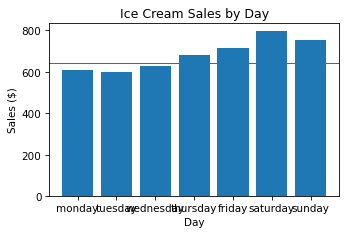

In [9]:
# make a bar chart by day of the week
plt.bar(x = avg_by_day.day_of_week, height = avg_by_day.sales_avg)
plt.axhline(y = 640, linewidth = 1)

plt.title('Ice Cream Sales by Day')
plt.xlabel('Day')
plt.ylabel('Sales ($)')
plt.show()

In [19]:
plt.savefig('ice_cream_sales-bar_graph_day.png', bbox_inches='tight', dpi=350)

<Figure size 900x450 with 0 Axes>

### Pie Chart

4. Next, let’s use a pie chart to visualize the top-selling flavors. Silly’s serves 16 flavors of ice cream – how many were the most popular flavor on at least one day in August? How do they compare to one another? Run the cell below to calculate the total count for each flavor that was listed as a top-seller in August. This code counts up the unique values in the top_flavor column of our original dataset and creates a new dataframe from them called popular_flavors. (Again, if you want to learn how to do this, check out our Data Science with Python course!)

In [10]:
# run this cell to create the data for our pie chart
# moosetracks is vanilla ice cream with mini peanut butter cups and fudge swirled in
popular_flavors = ic_data.top_flavor.value_counts().rename_axis('flavor').reset_index(name='count')
popular_flavors

,flavor,count
0,coffee,16
1,moosetracks,11
2,mint chip,4


5. Create a pie chart using the new popular_flavors dataframe. We recommend using tan, saddlebrown, and lightgreen for the three flavors.

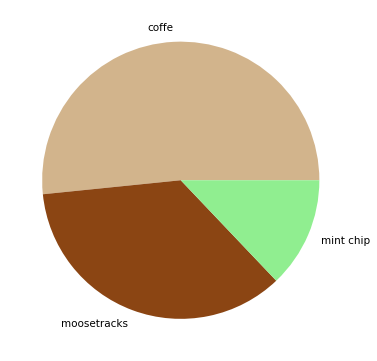

In [21]:
# pie chart
plt.pie(x = popular_flavors['count'], colors = ['tan', 'saddlebrown', 'lightgreen'], labels=['coffe', 'moosetracks', 'mint chip'])

plt.show()

In [17]:
plt.savefig('ice_cream_sales-pie_chart.png', bbox_inches='tight', dpi=350)

<Figure size 900x450 with 0 Axes>

### Scatterplot

6. Now, the owner is curious about the impact of weather on sales. Using our original dataset again, make two scatterplots in subplots to compare the effect of temperature on ice cream sales, and the effect of humidity on ice cream sales. (These columns are called max_temp and humidity_afternoon in our ic_data dataframe.) Should the owner consider adjusting the shop’s opening hours or days based on weather predictions, or preparing for high-volume days correlated with temperature or humidity?

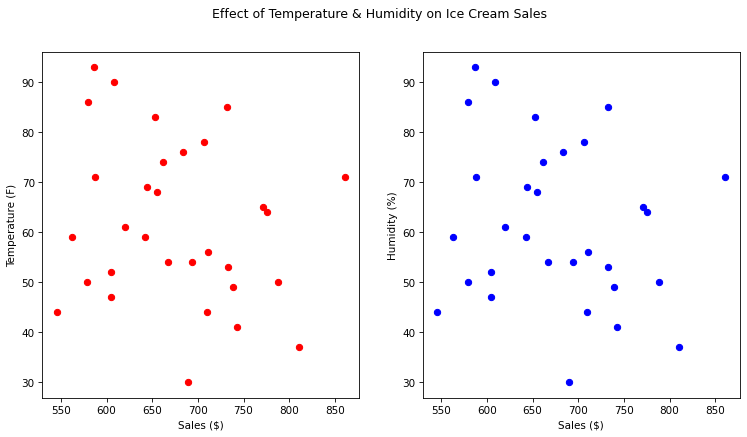

In [12]:
# scatterplot
plt.rcParams['figure.figsize'] = (12, 6)

plt.suptitle('Effect of Temperature & Humidity on Ice Cream Sales')

plt.subplot(1, 2, 1)
plt.scatter(ic_data.sales_total, ic_data.humidity_afternoon, color = 'red')
plt.ylabel('Temperature (F)')
plt.xlabel('Sales ($)')

plt.subplot(1, 2, 2)
plt.scatter(ic_data.sales_total, ic_data.humidity_afternoon, color = 'blue')
plt.ylabel('Humidity (%)')
plt.xlabel('Sales ($)')
plt.show()

In [16]:
plt.savefig('ice_cream_sales-scatterplot.png', bbox_inches='tight', dpi=350)

<Figure size 900x450 with 0 Axes>

### Histogram

7. Finally, let’s see how the sales data is distributed. Make a 10-bin histogram of the sales_total data.

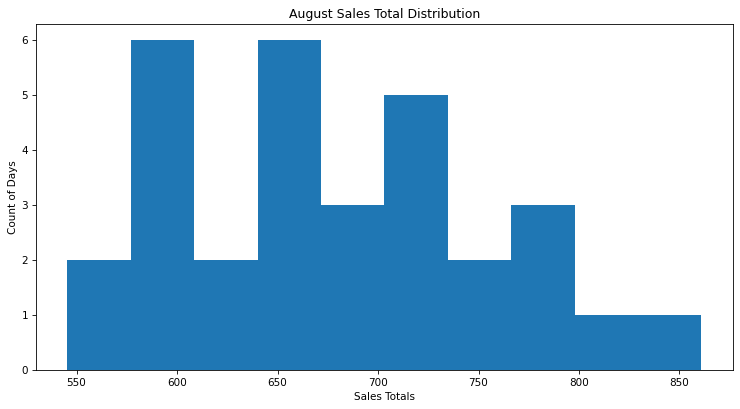

In [13]:
#histogram 
plt.hist(x = ic_data.sales_total, bins = 10)

plt.title('August Sales Total Distribution')
plt.xlabel('Sales Totals')
plt.ylabel('Count of Days')

plt.show()

8. Add a vertical AB line in a contrasting color at $640 to show the owner’s benchmark for a successful day of sales. Is most of the data above or below that line?

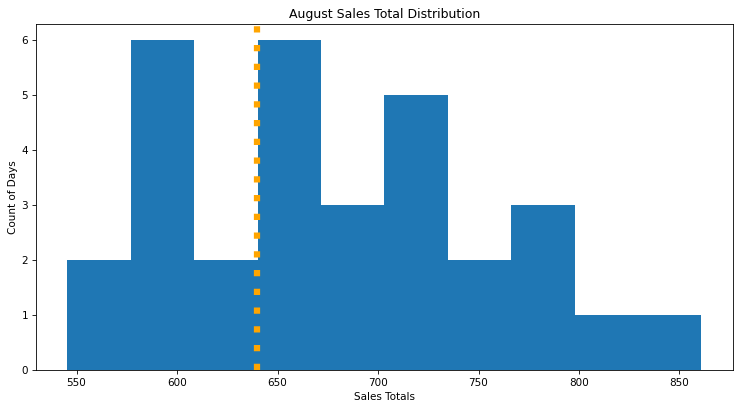

In [14]:
#histogram 
plt.hist(x = ic_data.sales_total, bins = 10)
plt.axvline(x=640, ymin=0, ymax=1, linewidth = 6, dashes=(1, 2), color='orange')

plt.title('August Sales Total Distribution')
plt.xlabel('Sales Totals')
plt.ylabel('Count of Days')

plt.show()

In [15]:
plt.savefig('ice_cream_sales-bar_chart.png', bbox_inches='tight', dpi=350)

<Figure size 900x450 with 0 Axes>